In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from matplotlib.patches import Rectangle, Circle

In [35]:
df = pd.read_csv("new-test-pf/mobility-data-2.csv")
# df["time"] = df["time"]/1e6

In [36]:
x1lap = [1.0, 1.5,  1.0, 0.5,  1.0, 1.5, 1.0, 0.5]
y1lap = [0.4, 0.8, 1.28, 1.8, 2.2, 1.8, 1.28, 0.8] 
n1laps = len(x1lap)
nlaps = 2
nc = n1laps*nlaps+1
xc = np.zeros(nc)
yc = np.zeros(nc)
for i in range(nc):
    xc[i] = x1lap[i%n1laps]
    yc[i] = y1lap[i%n1laps]
qc = np.arange(0,nc)
q = np.linspace(0, nc-1, 5000)
xref = CubicSpline(qc, xc)(q)
yref = CubicSpline(qc, yc)(q)

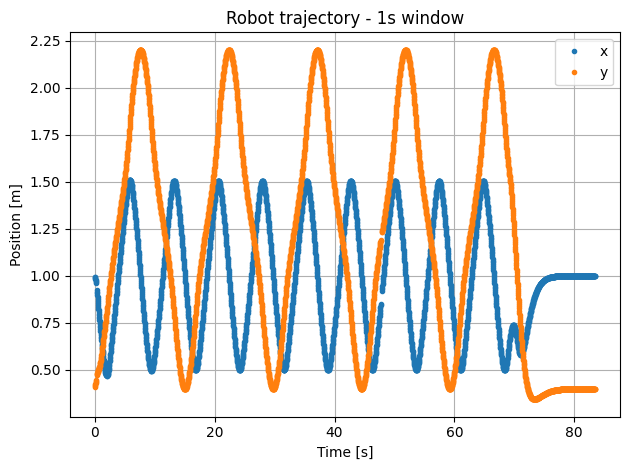

In [37]:
mask = np.logical_or(np.logical_and(df["time"] >= 10, df["time"] <= 10.1), True)
plt.title("Robot trajectory - 1s window")
# plt.plot(df["time"][mask], df["x"][mask], label="x")
# plt.plot(df["time"][mask], df["y"][mask], label="y")
plt.plot(df["time"][mask], df["x"][mask], ".", label="x")
plt.plot(df["time"][mask], df["y"][mask], ".", label="y")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()
plt.ylabel("Position [m]")
plt.tight_layout()
plt.savefig("trajectory-low-reset.pdf")
plt.savefig("trajectory-low-reset.png")
plt.show()

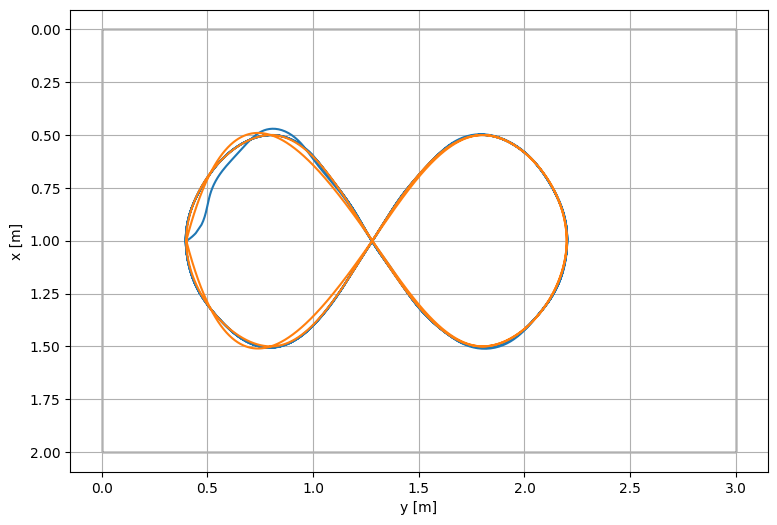

In [39]:
mask = df["mode"] != "ModePositionControl"
fig, ax = plt.subplots(figsize=(9,6))
ax.add_patch(Rectangle((0, 0), 3.0, 2.0, color='k', fill=False))
nskip = 1
ax.plot(df["y"][mask][::nskip], df["x"][mask][::nskip], '-')
ax.plot(yref, xref)
ax.axis("equal")
ax.grid()
ax.set_xlabel("y [m]")
ax.set_ylabel("x [m]")
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()